# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [119]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

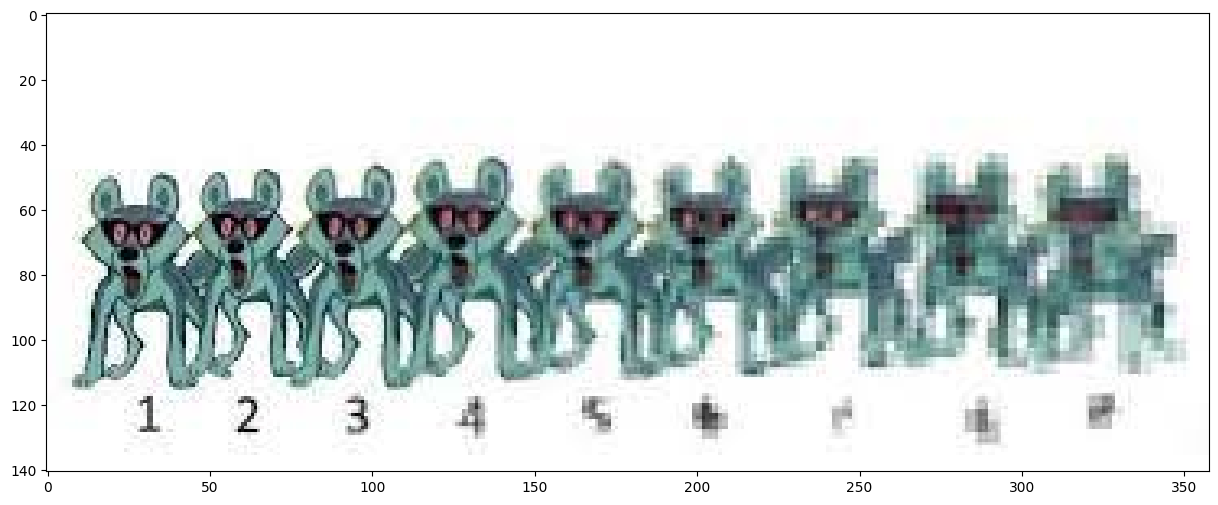

In [120]:
img = cv2.imread('./data/shakal.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

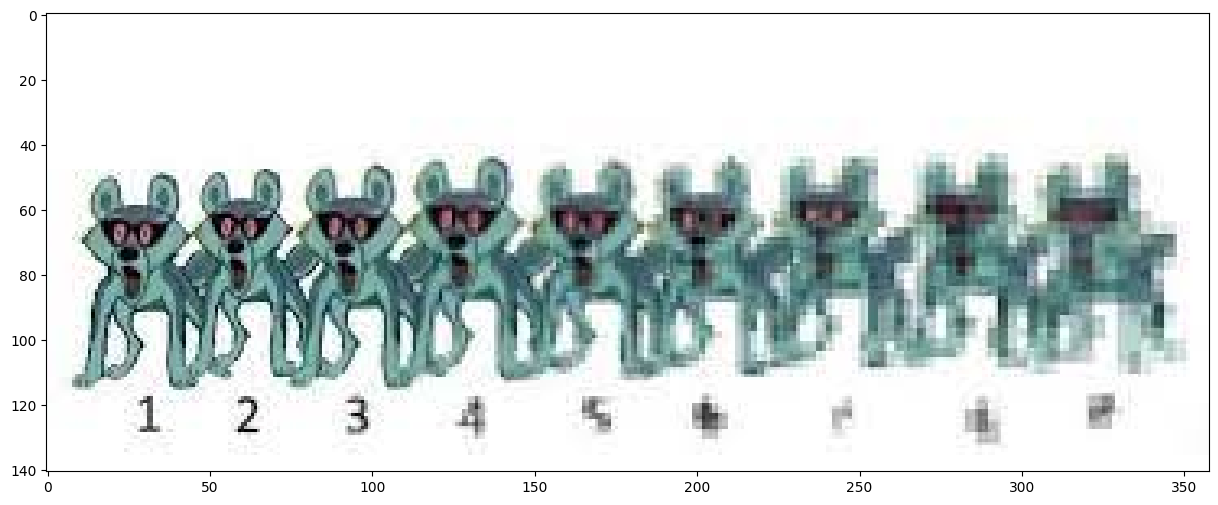

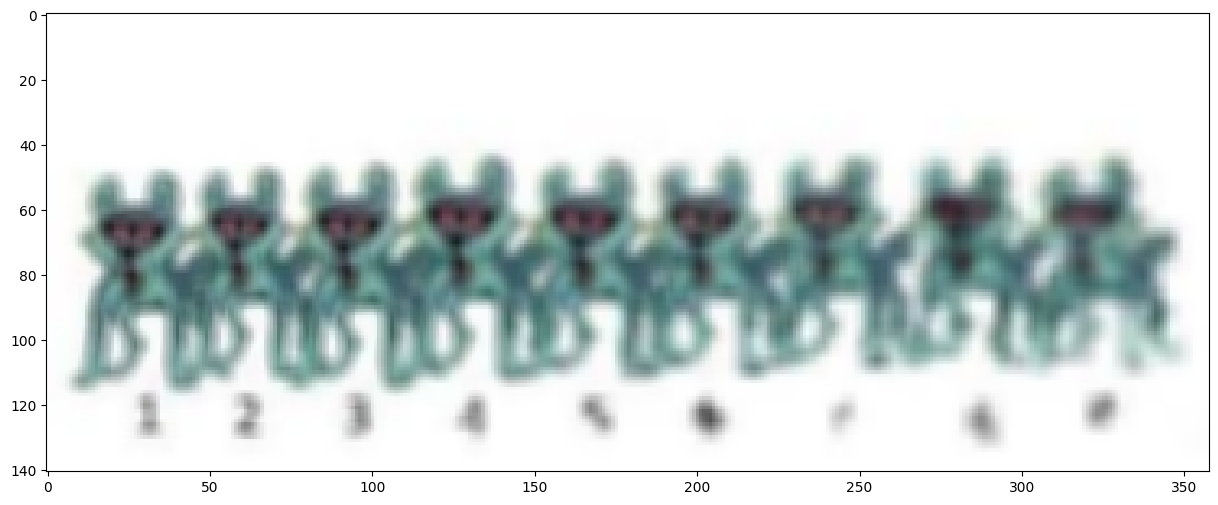

(<matplotlib.image.AxesImage at 0x185e79faad0>, None)

In [121]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.imshow(img), plt.show()
plt.imshow(unsharp), plt.show()

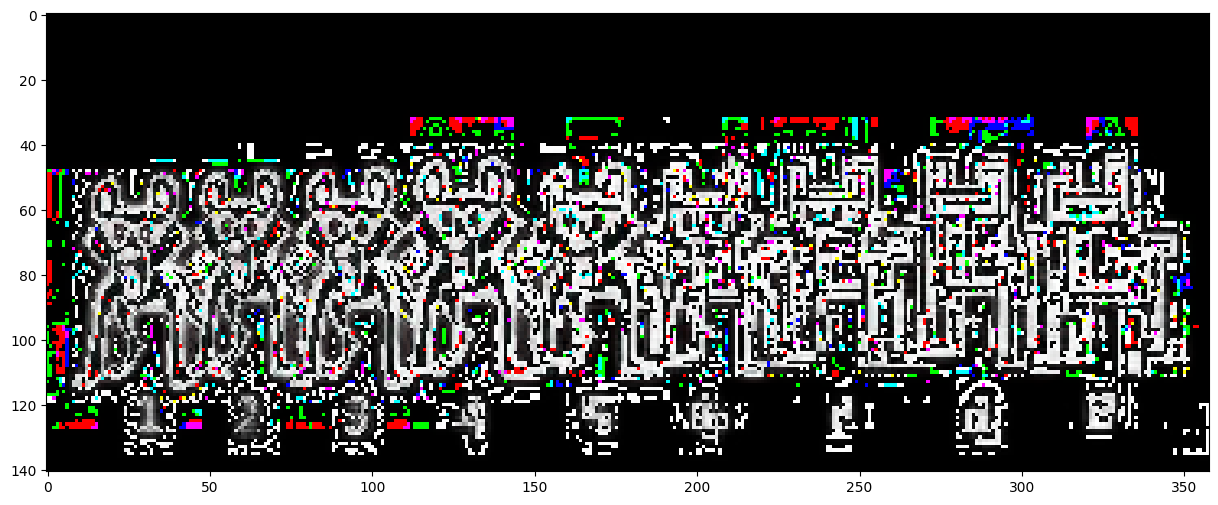

In [122]:

# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = cv2.subtract(img.astype(np.float32), unsharp.astype(np.float32)).astype(np.float32)
plt.imshow(diff.astype(np.uint8))

In [123]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 0.005
sharpened = cv2.add(img.astype(np.float32), cv2.multiply(diff, amount).astype(np.float32))

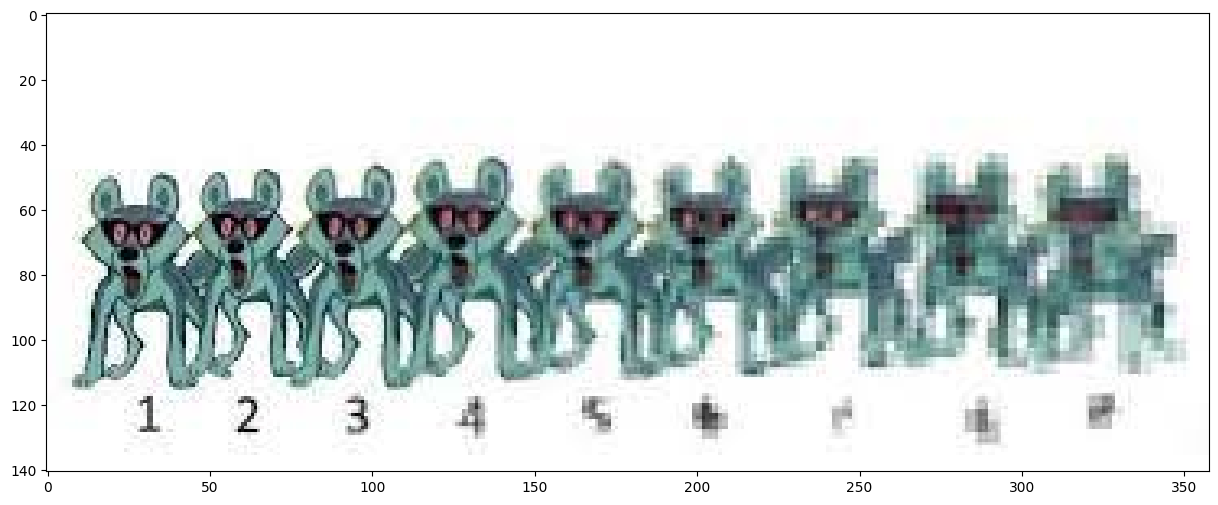

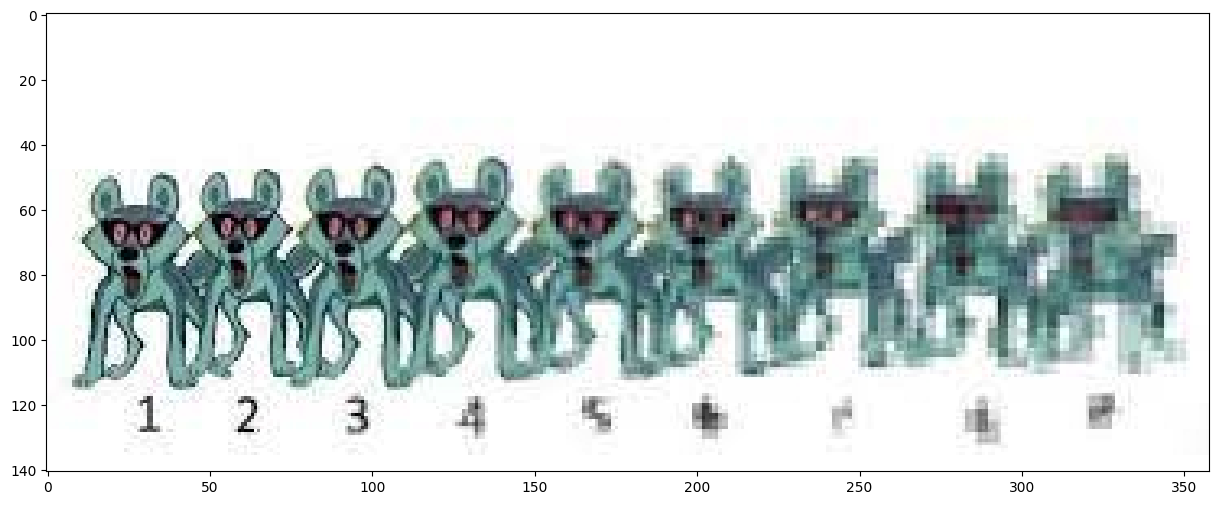

(<matplotlib.image.AxesImage at 0x185e84ef790>, None)

In [124]:
plt.imshow(img),plt.show()
plt.imshow(sharpened.astype(np.uint8)),plt.show()

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

### Висновки
- як на мене добрим параметром amount можна називати такі значення при яких не буде видно артефактів на результативному зображенні, 
але в тойже час поминні бути хотяби якісь зміни і бажано в кращу сторону. Мені підходить значення 0.01 і менше
- Якщо параметр надто малий - вихідне зображення буде дуже схожим на оригінальне.
- Якщо надто великий - можуть появлятись артефакти у вигляді пікселів різного кольору.